In [2]:
import numpy as np
import netCDF4

In [7]:
dataset = netCDF4.Dataset('../data/slp.4dx4dy.nh_ndjfm_19792019_subseas_cell.nc', 'r')

In [8]:
var = dataset.variables['var1'][:].data

In [9]:
var.shape

(6130, 16197)

In [10]:
var.T.shape

(16197, 6130)

# --------------------------Testing interpolation with matplotlib--------------------------

In [9]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [3]:
np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

In [6]:
print('\nx: ', x.shape, '\n', 'y: ', y.shape, '\n', 'z: ', z.shape)


x:  (200,) 
 y:  (200,) 
 z:  (200,)


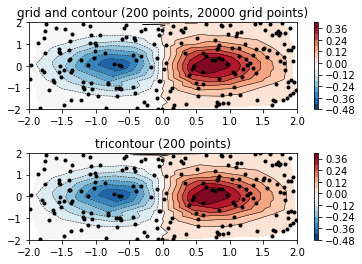

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()